In [1]:
#Impoting Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
#Reading the train and test data 

trainbike = pd.read_csv("/Users/devanshoojain/RPI Sem 1/Intro to Machine Learning Applications /Kaggle Bike Sharing Demand/bike-sharing-demand/train.csv", parse_dates = ['datetime'])
testbike = pd.read_csv("/Users/devanshoojain/RPI Sem 1/Intro to Machine Learning Applications /Kaggle Bike Sharing Demand/bike-sharing-demand/test.csv", parse_dates = ['datetime'])

In [3]:
#Studying the data 

trainbike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [36]:
trainbike.shape

(10886, 12)

In [37]:
testbike.shape

(6493, 9)

In [5]:
testbike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
trainbike.shape

(10886, 12)

In [7]:
trainbike.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [8]:
trainbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [10]:
trainbike.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
#Checking and removing outliers in count coloumn

train = trainbike[np.abs(trainbike["count"]-trainbike["count"].mean())<=(3*trainbike["count"].std())] 
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [12]:
train.shape

(10739, 12)

In [13]:
# Copying the orignal dataframe to new variables

trainbike_cp = train.copy()
testbike_cp = testbike.copy()

In [14]:
#Creating new datetime features in training set

trainbike_cp["year"] = trainbike_cp["datetime"].dt.year
trainbike_cp["hour"] = trainbike_cp["datetime"].dt.hour
trainbike_cp["dayofweek"] = trainbike_cp["datetime"].dt.dayofweek

In [15]:
trainbike_cp.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,4,5


In [16]:
#Creating new datetime features in testing set

testbike_cp["year"] = testbike_cp["datetime"].dt.year
testbike_cp["hour"] = testbike_cp["datetime"].dt.hour
testbike_cp["dayofweek"] = testbike_cp["datetime"].dt.dayofweek
testbike_cp.shape

(6493, 12)

In [17]:
#Dropping datetime coloumn for plotting visualizations

trainbike_cp = trainbike_cp.drop(columns='datetime')
trainbike_cp.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,4,5


<AxesSubplot:title={'center':'Pearson Correlation of BikeSharingDemand Features'}>

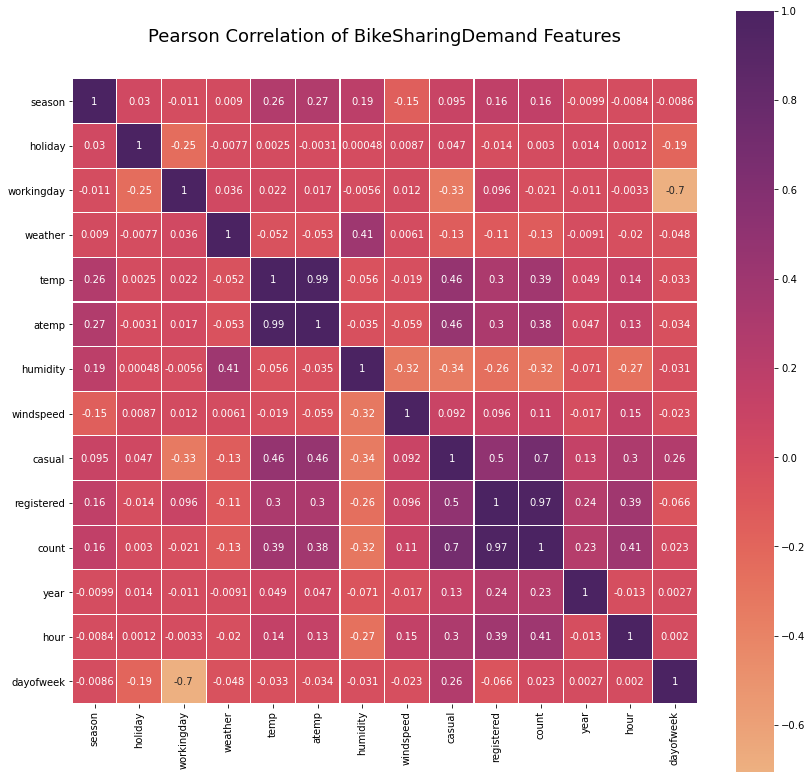

In [18]:
#Plotiing Visuals

plt.figure(figsize=(14,14))
plt.title('Pearson Correlation of BikeSharingDemand Features', y=1.05, size=18)
sns.heatmap(trainbike_cp.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap="flare", linecolor='white',annot= True)

<AxesSubplot:xlabel='weather', ylabel='count'>

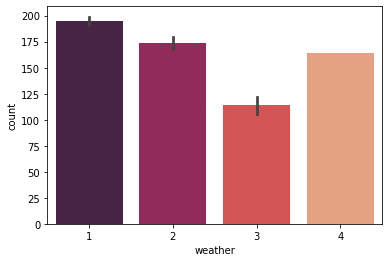

In [19]:
sns.barplot(x="weather", y="count", data=trainbike_cp, palette="rocket")

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

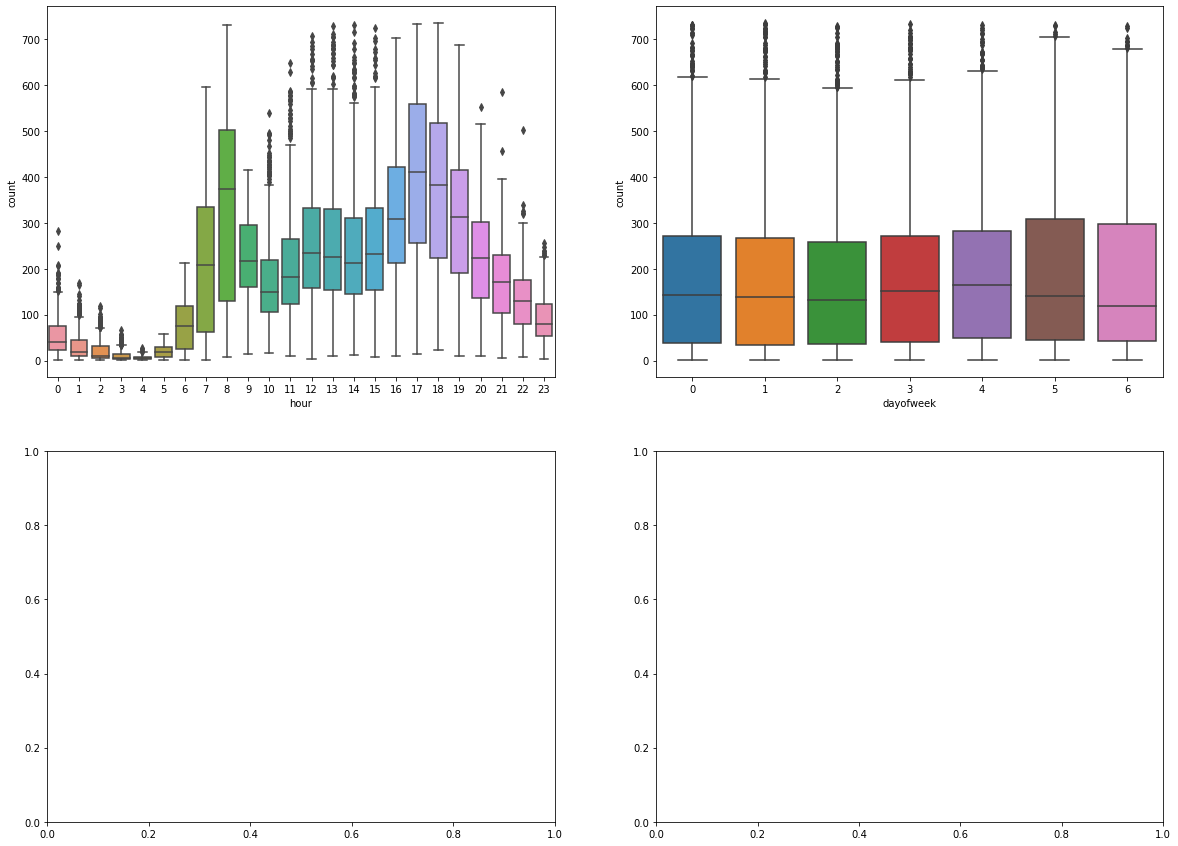

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,15))
sns.boxplot(data = trainbike_cp, y="count", x = "hour", orient = "v", ax=axes[0][0])
sns.boxplot(data = trainbike_cp, y="count", x = "dayofweek", orient = "v", ax=axes[0][1])

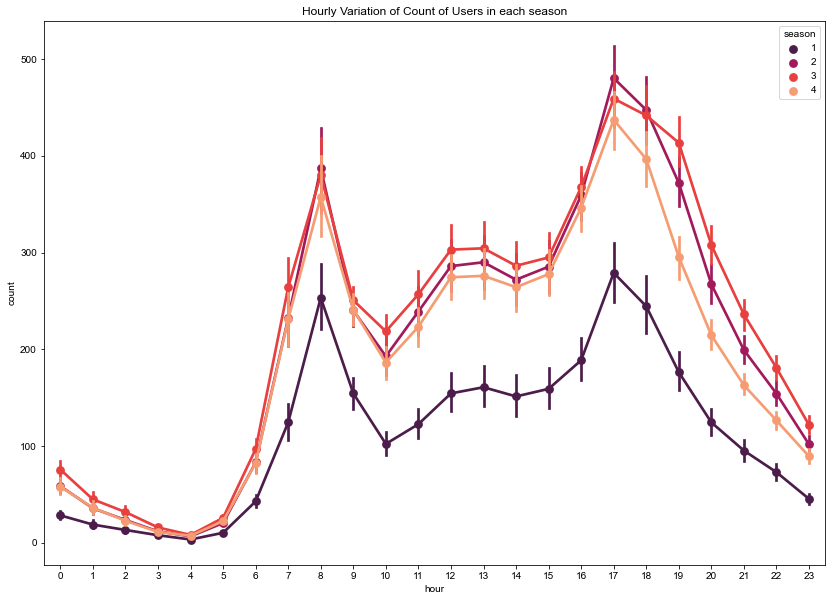

In [21]:
plt.figure(figsize=(14,10))
line = sns.pointplot(x='hour', y='count', data=trainbike_cp, hue='season', palette="rocket")
line.set_title('Hourly Variation of Count of Users in each season')
sns.set(style="darkgrid")

In [25]:
#Building model

X = trainbike_cp
X = X.drop(columns='count')
y = trainbike_cp['count']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

#Applying KNN and checking classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.048789571694599625

In [68]:
# check classification accuracy of Decision Tree
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.2808193668528864

In [204]:
# # Print Decision Tree
# from matplotlib import pyplot as plt
# from sklearn import tree

# fig = plt.figure(figsize=(12,12))
# _ = tree.plot_tree(clf, feature_names=trainbike_cp, filled=True)

In [35]:
# Randon forest regressor

model = RandomForestRegressor(n_estimators=140)
model.fit(X_train,y_train)
model_pred = model.predict(X_test)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, model_pred)))
# print('MSE:', metrics.mean_squared_error(y_test, model_pred))

RMSE: 3.0892972495851883
